# Data Loading and Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [3]:
df.head(5)

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       48204 non-null  int64  
 1   holiday              61 non-null     object 
 2   temp                 48204 non-null  float64
 3   rain_1h              48204 non-null  float64
 4   snow_1h              48204 non-null  float64
 5   clouds_all           48204 non-null  int64  
 6   weather_main         48204 non-null  object 
 7   weather_description  48204 non-null  object 
 8   date_time            48204 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
df.shape

(48204, 9)

In [6]:
categorical_cols = df.select_dtypes(exclude="number")
numerical_cols = df.select_dtypes(include="number")

In [7]:
numerical_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00


In [8]:
categorical_cols.describe().T

,count,unique,top,freq
holiday,61,11,Labor Day,7
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665
date_time,48204,40575,19-05-2013 10:00,6


# Data Manipulation

## Feature Extraction

In [9]:
df_dated = df.copy()

In [10]:


# Convert 'date_time' to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], format='mixed')

# Extract features from 'date_time'
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month



In [11]:
df['holiday'] = df['holiday'].fillna("None")

In [12]:
df = df.sort_values('date_time')

for lag in [1, 3, 24]:
    df[f'lag_{lag}'] = df['traffic_volume'].shift(lag)

df['rolling_mean_3h'] = df['traffic_volume'].shift(1).rolling(window=3).mean()
df['rolling_mean_24h'] = df['traffic_volume'].shift(1).rolling(window=24).mean()

df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['is_rush_hour'] = df['hour'].isin([7,8,9,16,17,18]).astype(int)

df = df.dropna()   # drop rows with NaNs from lag/rolling

## Data Cleaning

Converting Tempreture to Celsius

In [13]:
df['temp'] = df['temp'] - 273
df['temp']

1590     -1.00
1591     -0.87
1592     -1.19
1593     -1.37
1594     -1.46
         ...  
47638    27.14
47639    24.82
47640    23.10
47641    22.32
47642    21.46
Name: temp, Length: 48180, dtype: float64

Checking missing values

In [14]:
df.isna().sum()

traffic_volume         0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
hour                   0
day_of_week            0
month                  0
lag_1                  0
lag_3                  0
lag_24                 0
rolling_mean_3h        0
rolling_mean_24h       0
is_weekend             0
is_rush_hour           0
dtype: int64

Checking Duplicates

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.drop_duplicates(inplace=True)

Capitalizing Weather's Description

In [17]:
df['weather_description']=df['weather_description'].str.title()

In [18]:
print("Number of outliers:",df.loc[df['temp'] < -50].shape[0])
df.loc[df['temp'] < -50]

Number of outliers: 10


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day_of_week,month,lag_1,lag_3,lag_24,rolling_mean_3h,rolling_mean_24h,is_weekend,is_rush_hour
11898,361,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-01-31 03:00:00,3,4,1,313.0,644.0,382.0,449.000000,2611.416667,0,0
11899,734,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-01-31 04:00:00,4,4,1,361.0,390.0,833.0,354.666667,2610.541667,0,0
11900,2557,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-01-31 05:00:00,5,4,1,734.0,313.0,2519.0,469.333333,2606.416667,0,0
11901,5150,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-01-31 06:00:00,6,4,1,2557.0,361.0,3919.0,1217.333333,2608.000000,0,0
11946,291,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-02-02 03:00:00,3,6,2,539.0,1143.0,213.0,792.333333,3107.833333,1,0
11947,284,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-02-02 04:00:00,4,6,2,291.0,695.0,283.0,508.333333,3111.083333,1,0
11948,434,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-02-02 05:00:00,5,6,2,284.0,539.0,694.0,371.333333,3111.125000,1,0
11949,739,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-02-02 06:00:00,6,6,2,434.0,291.0,2439.0,336.333333,3100.291667,1,0
11950,962,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-02-02 07:00:00,7,6,2,739.0,284.0,5032.0,485.666667,3029.458333,1,1
11951,1670,None,-273.0,0.0,0.0,0,Clear,Sky Is Clear,2014-02-02 08:00:00,8,6,2,962.0,434.0,5654.0,711.666667,2859.875000,1,1


In [19]:
df = df.loc[df['temp'] > -50]


# EDA

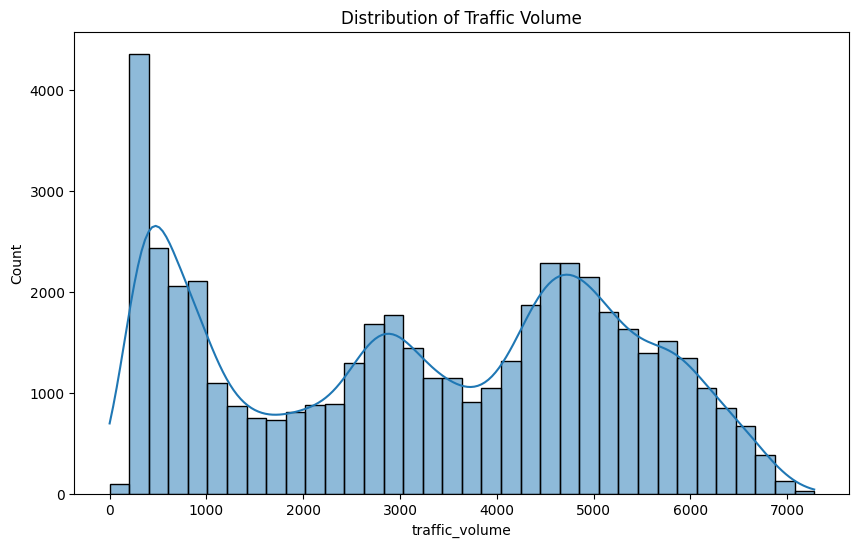

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

In [21]:
holidays_df = df.loc[df['holiday'] != 'None']
holidays_df

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day_of_week,month,lag_1,lag_3,lag_24,rolling_mean_3h,rolling_mean_24h,is_weekend,is_rush_hour
126,455,Columbus Day,0.080,0.00,0.0,20,Clouds,Few Clouds,2012-08-10,0,4,8,1667.0,2995.0,629.0,2438.000000,3737.750000,0,0
1370,919,Thanksgiving Day,5.540,0.00,0.0,20,Mist,Mist,2012-11-22,0,3,11,1399.0,2432.0,5343.0,1934.333333,4743.250000,0,0
1123,1000,Veterans Day,15.120,0.00,0.0,87,Clear,Sky Is Clear,2012-12-11,0,1,12,1897.0,6028.0,3020.0,4394.000000,3790.250000,0,0
2360,803,Christmas Day,-8.600,0.00,0.0,90,Clouds,Overcast Clouds,2012-12-25,0,1,12,1542.0,2463.0,664.0,2081.666667,2268.166667,0,0
2559,1439,New Years Day,-9.510,0.00,0.0,58,Clouds,Broken Clouds,2013-01-01,0,1,1,1596.0,2588.0,341.0,2159.000000,3139.416667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47331,962,Labor Day,19.430,0.25,0.0,1,Mist,Mist,2018-03-09,0,4,3,1833.0,2594.0,5213.0,2086.666667,4025.333333,0,0
47330,962,Labor Day,19.430,0.25,0.0,1,Rain,Light Rain,2018-03-09,0,4,3,962.0,1833.0,4577.0,1542.666667,3848.208333,0,0
45547,1021,Independence Day,24.550,0.00,0.0,1,Mist,Mist,2018-04-07,0,5,4,1115.0,2776.0,667.0,1920.666667,3632.125000,1,0
44441,1088,Memorial Day,26.487,0.00,0.0,24,Clouds,Few Clouds,2018-05-28,0,0,5,1660.0,2656.0,1633.0,2293.666667,2407.291667,0,0


In [22]:
holidays_df['holiday']

126          Columbus Day
1370     Thanksgiving Day
1123         Veterans Day
2360        Christmas Day
2559        New Years Day
               ...       
47331           Labor Day
47330           Labor Day
45547    Independence Day
44441        Memorial Day
46936          State Fair
Name: holiday, Length: 61, dtype: object

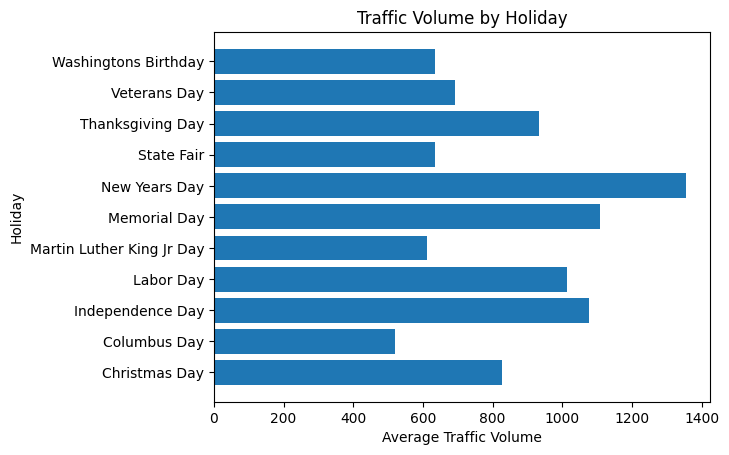

In [23]:
holiday_avg = holidays_df.groupby('holiday')['traffic_volume'].mean()

plt.barh(holiday_avg.index, holiday_avg.values)
plt.xlabel("Average Traffic Volume")
plt.ylabel("Holiday")
plt.title("Traffic Volume by Holiday")
plt.show()


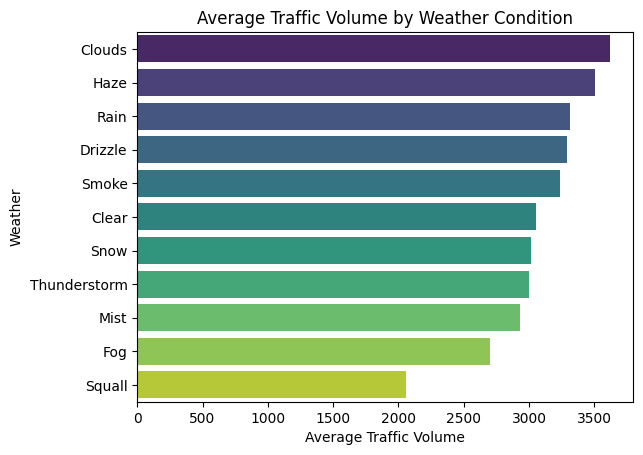

In [24]:
weather_avg = df.groupby('weather_main')['traffic_volume'].mean().reset_index()

# Sort for better readability
weather_avg = weather_avg.sort_values('traffic_volume', ascending=False)

# Plot
sns.barplot(data=weather_avg, x='traffic_volume', y='weather_main', palette='viridis')
plt.title("Average Traffic Volume by Weather Condition")
plt.xlabel("Average Traffic Volume")
plt.ylabel("Weather")
plt.show()

## Traffic Over Time

In [25]:
df_dated['date_time'] = pd.to_datetime(df_dated['date_time'], format='mixed')
df_2015 = df_dated.loc[df_dated['date_time'].dt.year == 2015]

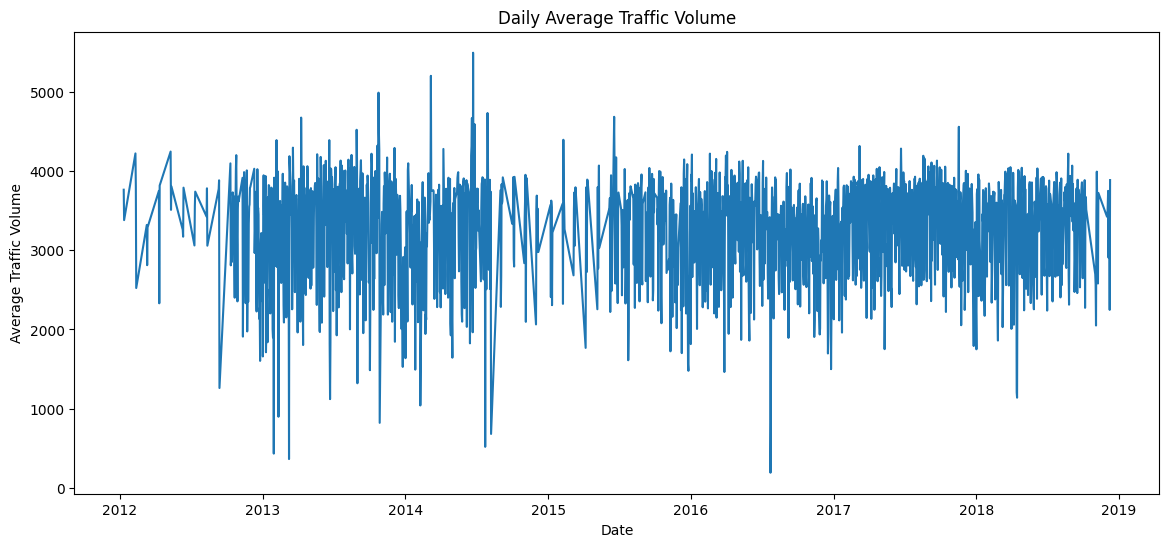

In [26]:
df_dated.set_index('date_time', inplace=True)

daily_avg = df_dated.resample('D')['traffic_volume'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=daily_avg, x='date_time', y='traffic_volume')
plt.title("Daily Average Traffic Volume")
plt.xlabel("Date")
plt.ylabel("Average Traffic Volume")
plt.show()

### Traffic's Peak Through the Day

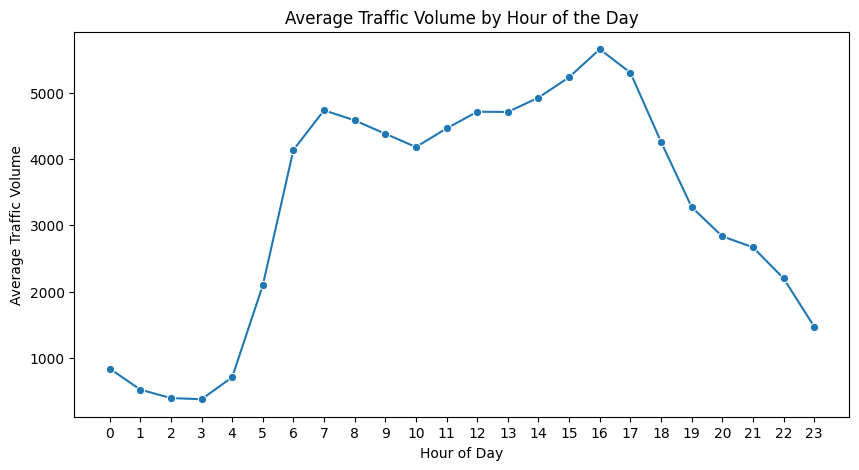

In [27]:
df_dated['hour'] = df_dated.index.hour
hour_of_day_avg = df_dated.groupby('hour')['traffic_volume'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=hour_of_day_avg, x='hour', y='traffic_volume', marker='o')
plt.title("Average Traffic Volume by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Traffic Volume")
plt.xticks(range(0, 24))
plt.show()


# Modeling

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        print("Train Result:\n================================================")
    else:
        pred = model.predict(X_test)
        print("Test Result:\n================================================")
    
    mae = mean_absolute_error(y_train if train else y_test, pred)
    mse = mean_squared_error(y_train if train else y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train if train else y_test, pred)

    results = pd.DataFrame({
        "MAE": [mae],
        "MSE": [mse],
        "RMSE": [rmse],
        "R²": [r2]
    })

    print(results.to_string(index=False))
    print("================================================\n")


Whether label encoding or one-hot encoding will perform better in an interstate traffic analysis project depends on the nature of your categorical variables and the model you're using. Label encoding assigns integers to categories (e.g., 0, 1, 2), which can imply an ordinal relationship that may not exist in traffic data (e.g., states or road types). This could mislead tree-based models (like decision trees or random forests) or linear models, potentially leading to poorer performance if the order is meaningless.

One-hot encoding creates binary columns for each category (e.g., state_A, state_B), avoiding ordinal assumptions and working well with most machine learning algorithms, especially linear models. However, it can increase dimensionality significantly, which might be a concern with many categories (e.g., numerous states or traffic conditions), potentially leading to the curse of dimensionality or requiring more data.

For interstate traffic analysis, where categorical variables like states or weather conditions likely lack a natural order, one-hot encoding is generally safer and more appropriate unless the number of categories is very large. Label encoding might be viable if you're using a tree-based model and the variable has a logical order (e.g., traffic density levels), but this is less common in such projects. Given the context, one-hot encoding is likely to perform better or at least more reliably.


In [29]:
features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all',
            'holiday', 'weather_main', 'weather_description',
            'hour', 'day_of_week', 'month']
X = df[features]

y = df['traffic_volume']

numerical_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
categorical_cols = ['holiday', 'weather_main', 'weather_description']


In [30]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

## Baseline Model

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict mean value for all samples
baseline_prediction = np.full_like(y, y.mean())

# Evaluate baseline
mae = mean_absolute_error(y, baseline_prediction)
mse = mean_squared_error(y, baseline_prediction)
r2 = r2_score(y, baseline_prediction)

print(f"Baseline MAE: {mae:.2f}")
print(f"Baseline MSE: {mse:.2f}")
print(f"Baseline R²: {r2:.2f}")


Baseline MAE: 1744.81
Baseline MSE: 3946620.67
Baseline R²: -0.00


## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lr_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [34]:

lr_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'rain_1h', 'snow_1h',
                                                   'clouds_all']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['holiday', 'weather_main',
                                                   'weather_description'])])),
                ('regressor', LinearRegression())])

In [35]:
print_score(lr_reg,X_train,y_train, X_test,y_test, train= True)
print_score(lr_reg,X_train,y_train, X_test,y_test, train= False)

Train Result:
       MAE          MSE       RMSE       R²
1687.03896 3.780585e+06 1944.37267 0.045946

Test Result:
        MAE          MSE        RMSE       R²
1647.864389 3.637960e+06 1907.343783 0.062974



In [36]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression pipeline
ridge_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0, random_state=42))
])

# Lasso Regression pipeline
lasso_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.01, random_state=42))
])


In [37]:


ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'rain_1h', 'snow_1h',
                                                   'clouds_all']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['holiday', 'weather_main',
                                                   'weather_description'])])),
                ('regressor', Lasso(alpha=0.01, random_state=42))])

In [38]:
print_score(ridge_reg,X_train,y_train, X_test,y_test, train= True)
print_score(ridge_reg,X_train,y_train, X_test,y_test, train= False)

Train Result:
        MAE          MSE        RMSE       R²
1687.123434 3.780645e+06 1944.388164 0.045931

Test Result:
       MAE          MSE        RMSE       R²
1647.64315 3.636823e+06 1907.045737 0.063267



In [39]:
print_score(lasso_reg,X_train,y_train, X_test,y_test, train= True)
print_score(lasso_reg,X_train,y_train, X_test,y_test, train= False)

Train Result:
        MAE          MSE        RMSE      R²
1687.104462 3.780611e+06 1944.379269 0.04594

Test Result:
        MAE          MSE       RMSE       R²
1647.733411 3.637203e+06 1907.14537 0.063169



### Resdiual Analysis

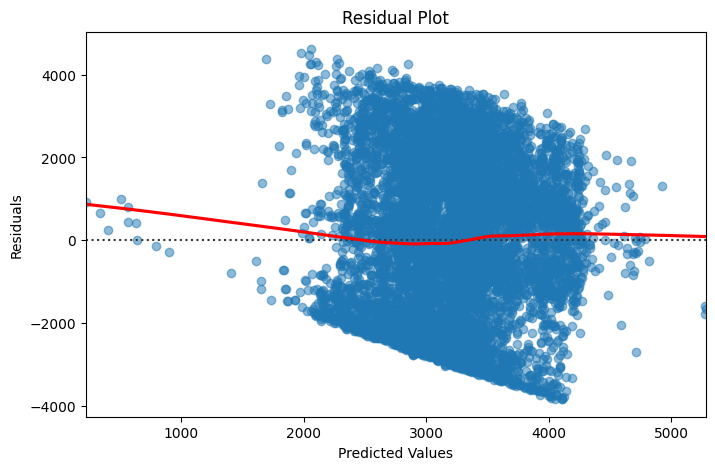

In [41]:
y_pred = lr_reg.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 5))
sns.residplot(x=y_pred, y=residuals, lowess=True,
              scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Normality of Resdiuals Test

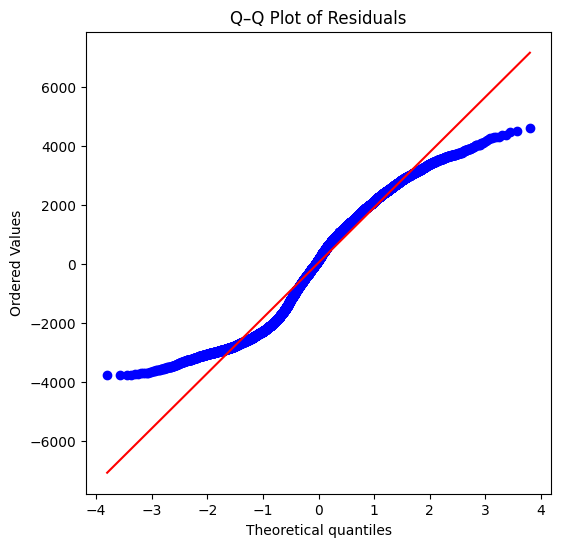

In [42]:
import scipy.stats as stats
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.show()

### Independence Test

In [43]:
from scipy.stats import chi2_contingency


# converting continuous target into categories (e.g., 3 bins)
df['traffic_category'] = pd.qcut(df['traffic_volume'], q=3, labels=['Low', 'Medium', 'High'])



for feature in categorical_cols:
    contingency = pd.crosstab(df[feature], df['traffic_category'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test for {feature} vs Traffic Category: p-value = {p:.4f}")

    alpha = 0.05
    if p <= alpha:
        print(f"Result: Significant association (p ≤ {alpha}) - REJECT null hypothesis")
    else:
        print(f"Result: No significant association (p > {alpha}) - FAIL TO REJECT null hypothesis")

    print("-" * 50)


Chi-square test for holiday vs Traffic Category: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for weather_main vs Traffic Category: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------
Chi-square test for weather_description vs Traffic Category: p-value = 0.0000
Result: Significant association (p ≤ 0.05) - REJECT null hypothesis
--------------------------------------------------


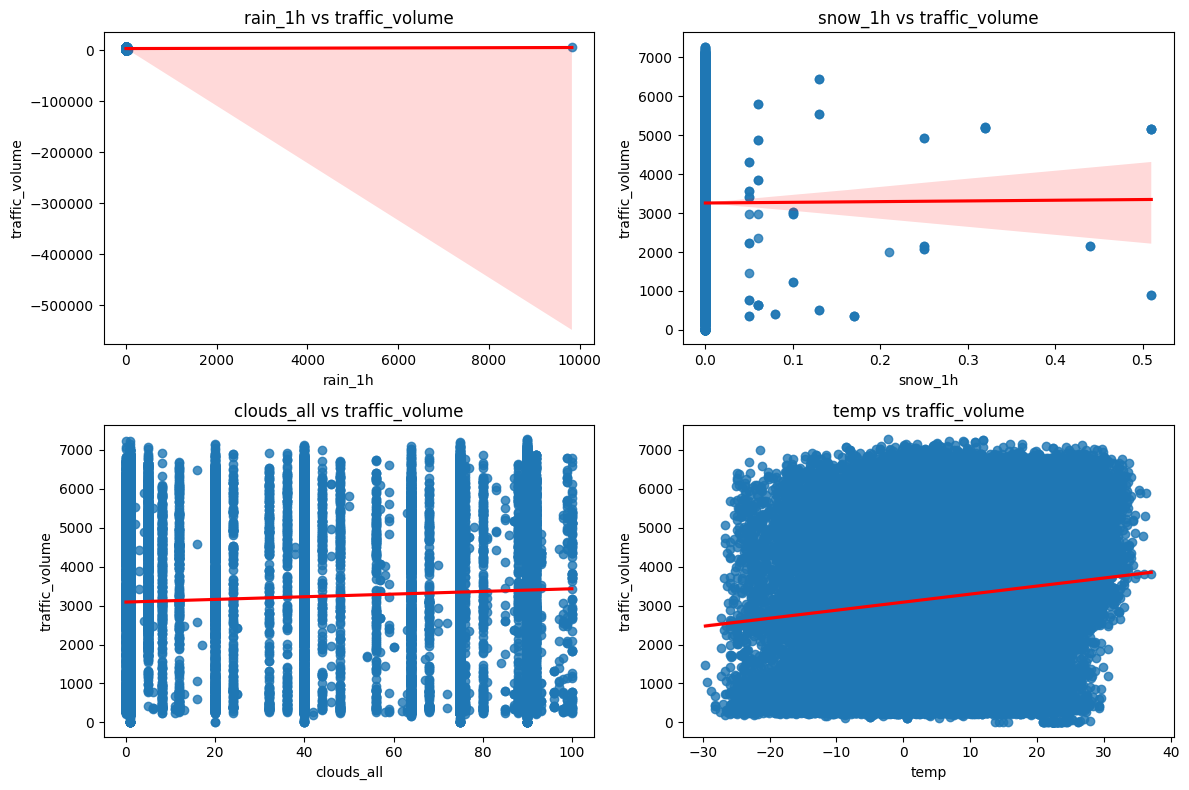

In [44]:
# Example numeric features
target = 'traffic_volume'

# Create subplots
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(numerical_cols):
    sns.regplot(
        x=df[feature], 
        y=df[target],
        line_kws={'color': 'red'},
        ax=axes[i-1]
    )
    axes[i-1].set_title(f'{feature} vs {target}')

# Remove any empty subplots if number of features is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Random Forest

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


from sklearn.ensemble import RandomForestRegressor
reg_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

reg_rf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define columns
numerical_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all',
                  "lag_1", "lag_3", "lag_24", "rolling_mean_3h", "rolling_mean_24h"]
categorical_cols = ['holiday', 'weather_main', 'weather_description',
                    'hour', 'day_of_week', 'month',
                    'is_weekend', 'is_rush_hour']

X = df[numerical_cols + categorical_cols]
y = df["traffic_volume"]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Model pipeline
rf_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200, random_state=42, n_jobs=-1))
])

# Walk-forward validation
tscv = TimeSeriesSplit(n_splits=5)

fold = 1
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_reg.fit(X_train, y_train)
    preds = rf_reg.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    print(f"Fold {fold} Results:")
    print(f" MAE: {mae:.2f}")
    print(f" RMSE: {rmse:.2f}")
    print(f" R²: {r2:.4f}\n")
    fold += 1


Fold 1 Results:
 MAE: 232.88
 RMSE: 461.58
 R²: 0.9472

Fold 2 Results:
 MAE: 264.93
 RMSE: 510.58
 R²: 0.9342

Fold 3 Results:
 MAE: 208.70
 RMSE: 361.77
 R²: 0.9653

Fold 4 Results:
 MAE: 176.89
 RMSE: 284.10
 R²: 0.9795

Fold 5 Results:
 MAE: 170.68
 RMSE: 273.02
 R²: 0.9808



In [ ]:
print_score(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score(rf_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
      MAE          MSE       RMSE       R²
70.539307 16178.133865 127.193293 0.995915

Test Result:
       MAE          MSE       RMSE       R²
170.682849 74539.504496 273.019238 0.980788

